In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math #?
import sympy
from sklearn.cluster import SpectralClustering
from collections import Counter
from docx import Document
from tabulate import tabulate

## Analiza SNet mreze

Ucitavanje mreze

In [3]:
SNet = nx.DiGraph(nx.read_gml('models/SNet.gml'))
print(nx.info(SNet))

DiGraph with 3565 nodes and 313918 edges


Određivanje autoriteta i habova

In [11]:
authorities = nodes_with_max_weighted_degree(SNet, 10, in_degree = True)
hubs = nodes_with_max_degree(SNet, 10)

Ispis najznačajnijih autoriteta i habova u mrezi

In [12]:
print("Authorities")
print(tabulate(authorities, headers=['Subreddit', 'In Degree']))

print("Hubs")
print(tabulate(hubs, headers=['Subreddit', 'Out Degree']))

Authorities
Subreddit      In Degree
-----------  -----------
reddit.com      774.842
politics        236.863
programming     149.002
pics            107.042
technology       78.4586
science          78.439
worldnews        75.7621
WTF              74.6186
AskReddit        72.0528
business         70.2864
Hubs
Subreddit        Out Degree
-------------  ------------
reddit.com             3143
technology             2221
politics               2211
pics                   2171
funny                  2123
science                2105
worldnews              2091
entertainment          2061
WTF                    2044
programming            2043


Određivanje lokalnog i globalnog stepena klasterizacije

In [ ]:
calculate_clustering_coefficients(SNet)
print("---------------------------------------")
calculate_clustering_coefficients_in_er_graph(SNet)

Detekcija komuna korišćenjem propagacije labela

In [ ]:
from networkx.algorithms import community as nx_comm

communities = nx_comm.asyn_lpa_communities(SNet, weight='weight')

Izračunavanje modularnosti dobijene podele

In [271]:
print(nx_comm.modularity(SNet, communities, weight='weight'))

0.06010097272693596


C:\Users\popov\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\popov\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


         k      lambda_k
0        1 -1.462965e-15
1        2  4.987101e-02
2        3  4.996241e-02
3        4  4.999370e-02
4        5  5.000000e-02
...    ...           ...
3560  3561  1.950000e+00
3561  3562  1.950000e+00
3562  3563  1.950000e+00
3563  3564  1.950000e+00
3564  3565  1.950000e+00

[3565 rows x 2 columns]


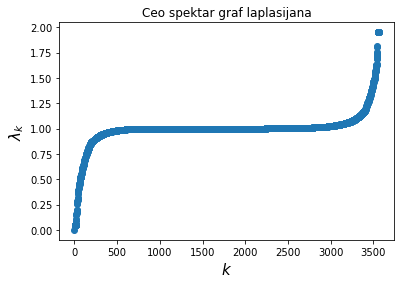

In [13]:
df_eig = calculate_eigenvector(SNet)

In [14]:
candidates = find_best_candidates_for_number_of_clasters(df_eig)
print(tabulate(candidates))

----  ---------
3550  0.137974
  32  0.0661555
3540  0.055839
   2  0.049871
3548  0.0488919
  41  0.0415364
  23  0.0364433
  21  0.0355918
  22  0.020283
3547  0.0194607
----  ---------


## Analiza SNetF mreze

Ucitavanje mreze

In [15]:
SNetF = nx.DiGraph(nx.read_gml('models/SNetF-4.gml'))
print(nx.info(SNetF))

DiGraph with 3565 nodes and 3138 edges


Izbacivanje izolovanih cvorova 

In [16]:
SNetF = remove_nodes(SNetF)
print(nx.info(SNetF))

DiGraph with 2706 nodes and 3138 edges


Čuvanje mreže u gml formatu

In [ ]:
output_path = "models/SNetF.gml"

nx.write_gml(SNetF, output_path)

Određivanje autoriteta i habova u mreži

In [17]:
authorities = nodes_with_max_weighted_degree(SNetF, 10, in_degree = True)
hubs = nodes_with_max_degree(SNetF, 10)

Ispis najznačajnijih autoriteta i habova

In [18]:
print("Authorities")
print(tabulate(authorities, headers=['Subreddit', 'In degree']))
print("--------------------------------------------")
print("Hubs")
print(tabulate(hubs, headers=['Subreddit', 'Out Degree']))

Authorities
Subreddit        In degree
-------------  -----------
reddit.com        596.046
politics          107.157
programming        86.1108
pics               22.1074
business           20.3021
technology         20.2619
entertainment      16.771
Chinese            14.9708
worldnews          13.2537
AskReddit          11.3561
--------------------------------------------
Hubs
Subreddit           Out Degree
----------------  ------------
ryansjones                   4
boardgames                   4
WhiteCollarFraud             3
otaku                        3
Gears                        3
ourdyingplanet               3
nota                         3
DBpooper                     3
policeabuse                  3
outsourcing                  3


Određivanje lokalnog i globalnog stepena klasterizacije i poređenje sa Erdos-Renyi mrežom

In [ ]:
calculate_clustering_coefficients(SNetF)
print("-----------------------------")
calculate_clustering_coefficients_in_er_graph(SNetF)

Određivanje najboljih kandidata za broj komuna 

C:\Users\popov\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\popov\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


         k      lambda_k
0        1  6.605827e-15
1        2  4.160695e-02
2        3  4.299994e-02
3        4  4.422720e-02
4        5  4.599093e-02
...    ...           ...
2701  2702  1.950033e+00
2702  2703  1.950252e+00
2703  2704  1.950319e+00
2704  2705  1.950411e+00
2705  2706  1.950777e+00

[2706 rows x 2 columns]


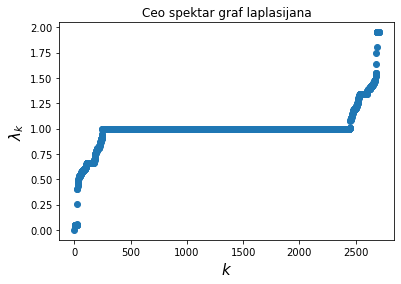

In [19]:
df_eig = calculate_eigenvector(SNetF)
candidates = find_best_candidates_for_number_of_clasters(df_eig)

Ispis najboljih vrednosti za broj komuna

In [20]:
print(tabulate(candidates))

----  ---------
  25  0.200283
  26  0.142059
2687  0.139991
2685  0.109161
2684  0.0824638
2686  0.0675086
2452  0.0673314
 248  0.05544
   2  0.0416069
2677  0.0372236
----  ---------


Ispis prvih 30 sopstvenih vrednosti graf laplasijana

In [ ]:
df_eig_first = df_eig[0:30]

plot_scatterplot(df_eig_first.iloc[:,0], df_eig_first.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana')

Podela mreže na komune spektralnom analizom predloženim brojem komuna i čuvanje mreže u fajl

In [ ]:
save_spectral_analysis_graph(SNetF, "SNetF", candidates[0]['k'])

## Analiza SNetT mreze 

Ucitavanje mreze

In [ ]:
SNetT = nx.DiGraph(nx.read_gml('models/SNetTT.gml'))
print(nx.info(SNetT))

Određivanje autoriteta i habova u mreži

In [ ]:
authorities = nodes_with_max_weighted_degree(SNetT, 10, in_degree = True)
hubs = nodes_with_max_degree(SNetT, 10)

Ispis najznačajnijih autoriteta i habova u mreži

In [ ]:
print("Authorities")
print(tabulate(authorities, headers=['Subreddit', 'In Degree']))

print("Hubs")
print(tabulate(hubs, headers=['Subreddit', 'Out Degree']))

Izračunavanje lokalnog i globalnog stepena klasterizacije i poređenje sa Erdos-Renyi mrežom

In [ ]:
calculate_clustering_coefficients(SNetT, True)
print("---------------------------------------")
calculate_clustering_coefficients_in_er_graph(SNetT)

Određivanje najboljih kandidata za broj komuna

In [ ]:
df_eig = calculate_eigenvector(SNetT)
candidates = find_best_candidates_for_number_of_clasters(df_eig)

Ispis najboljih kandidata za broj komuna

In [ ]:
print(tabulate(candidates))

Podela mreže na predloženi broj komuna spektralnom analizom i čuvanje mreže u gml formatu

In [ ]:
save_spectral_analysis_graph(SNetT, "SNetT", candidates[0]['k'])
save_spectral_analysis_graph(SNetT, "SNetT", 5)

Podela mreže na 3 komune radi poređenja sa Louvain metodom u alatu Gephi

In [ ]:
save_spectral_analysis_graph(SNetT, "SNetT", 3)

## Analiza UserNet mreze

Učitavanje mreže

In [251]:
UserNet = nx.DiGraph(nx.read_gml('models/user_10.gml'))
print(nx.info(UserNet))

DiGraph with 2108 nodes and 5376 edges


Određivanje autoriteta i habova u mreži

In [252]:
authorities = nodes_with_max_weighted_degree(UserNet, 10, in_degree = True)
hubs = nodes_with_max_weighted_degree(UserNet, 10)

Ispis najznačajnijih autoriteta i habova u mreži

In [253]:
print("Authorities")
print(tabulate(authorities, headers=['Subreddit', 'In Degree']))

print("Hubs")
print(tabulate(hubs, headers=['Subreddit', 'Out Degree']))

Authorities
Subreddit               In Degree
--------------------  -----------
qgyh2                         321
rmuser                        319
gst                           203
alllie                        159
malcontent                    100
NoMoreNicksLeft                99
georgewashingtonblog           92
noname99                       87
maxwellhill                    85
twolf1                         84
Hubs
Subreddit           Out Degree
----------------  ------------
malcontent                 123
NoMoreNicksLeft            115
matts2                     110
redditcensoredme            76
aletoledo                   62
sakebomb69                  51
revoman                     43
7oby                        39
otakucode                   39
alllie                      35


Izračunavanje lokalnog i globalnog stepena klasterizacije i poređenje sa Erdos-Renyi mrežom

In [254]:
calculate_clustering_coefficients(UserNet)
print("---------------------------------------")
calculate_clustering_coefficients_in_er_graph(UserNet)

Max lokalni cc: 1.0
Prosečan cc: 0.0007654946679336924
Globalni koeficijent klasterisanja: 0.07874884192879517
---------------------------------------
Verovatnoca postojanja grane: 0.001210386630271013
Max lokalni cc: 0.5
Prosečan cc: 0.001188610830451437
Globalni koeficijent klasterisanja: 0.00125


### Funkcija za spektralno klasterisanje grafa  

In [5]:
def save_spectral_analysis_graph(G, net, k):
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(G))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G2 = nx.DiGraph()
    for c, label in zip(c_string, G.nodes()):
        G2.add_node(label, color=c)

    for edge in G.edges(data=True):
        #print(edge)
        G2.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    nx.write_gml(G2, f"models/{net}{k}.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")

### Određivanje čvorova sa najvećim stepenima

In [6]:
def nodes_with_max_weighted_degree(G, n, in_degree = False, weight = False):
    if (in_degree):
        nodes = sorted(G.in_degree(weight='weight'), key=lambda x: x[1], reverse=True)
    else:
        nodes = sorted(G.out_degree(weight='weight'), key=lambda x: x[1], reverse=True)
   
    return nodes[0:10] 

def nodes_with_max_degree(G, n, in_degree = False, weight = False):
    if (in_degree):
        nodes = sorted(G.in_degree, key=lambda x: x[1], reverse=True)
    else:
        nodes = sorted(G.out_degree, key=lambda x: x[1], reverse=True)
    
    return nodes[0:10] 

### Izračunavanje koeficijenata klasterizacije 

In [7]:
def calculate_clustering_coefficients(G, weight=False):
    if (weight):
        subreddit, clustering_coef = zip(*nx.clustering(G, weight='weight').items())
        #average_clustering_degree = nx.average_clustering(G, weight='weight')
    else:
        subreddit, clustering_coef = zip(*nx.clustering(G).items())
        #average_clustering_degree = nx.average_clustering(G)

    not_zero = [(s, cc)  for s, cc in zip(subreddit, clustering_coef) if cc > 0]

    df = pd.DataFrame(not_zero, columns = ["subreddit", "cc"])
    df.sort_values('cc', inplace = True)

    max_clustering_degree = max(clustering_coef)
    
    global_clustering_coef = nx.transitivity(G)

    print(f"Max lokalni cc: {max_clustering_degree}")
    print(f"Prosečan cc: {average_clustering_degree}")
    print(f"Globalni koeficijent klasterisanja: {global_clustering_coef}")
    #print("Lokalni stepeni klasterisanja koji nisu nula:")
    #print(df)

def calculate_clustering_coefficients_in_er_graph(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()

    p = (float(m)) / (n * (n - 1) )
    print(f"Verovatnoca postojanja grane: {p}")

    er_graph = nx.erdos_renyi_graph(n,p, directed=True)

    subreddit, clustering_coef = zip(*nx.clustering(er_graph).items())

    not_zero = [(s, cc)  for s, cc in zip(subreddit, clustering_coef) if cc > 0]

    df = pd.DataFrame(not_zero, columns = ["subreddit", "cc"])
    df.sort_values('cc', inplace = True)

    max_clustering_degree = max(clustering_coef)
    average_clustering_degree = nx.average_clustering(er_graph)
    global_clustering_coef = nx.transitivity(er_graph)

    print(f"Max lokalni cc: {max_clustering_degree}")
    print(f"Prosečan cc: {average_clustering_degree}")
    print(f"Globalni koeficijent klasterisanja: {global_clustering_coef}")
    #print("Lokalni stepeni klasterisanja koji nisu nula:")
    #print(df)

### Funkcije za vizuelizaciju

In [8]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    #plt.savefig(f"etf/{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{file_name}.svg")
    plt.show() 

def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

### Izbacivanje izolovanih čvorova iz mreže

In [9]:
def remove_nodes(g, degree=0):
    g2=g.copy()
    nodes_to_delete = list()
    for n in g.nodes():
        if g.degree(n) == degree: 
            nodes_to_delete.append(n)
    g2.remove_nodes_from(nodes_to_delete)
    return g2

### Izračunavanje sopstvenih vrednosti grafa Laplasijana za usmerene grafove

In [10]:
def calculate_eigenvector(G):
    L = nx.directed_laplacian_matrix(G, weight = 'weight')
    L = np.asarray(L)

    eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
    eigenvalues.sort()
    enumerator = np.array(range(1, len(eigenvalues)+1))
    df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))
    df_eig.columns = ['k', 'lambda_k']
    df_eig = df_eig.astype({'k': 'int32', 'lambda_k':'float'})
    print(df_eig)

    plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')
    return df_eig

def find_best_candidates_for_number_of_clasters(df_eig, n = 10):
    delta_k = list()
    for i in range(1, len(df_eig)):
        delta_k.append({"k": i + 1, "delta": df_eig['lambda_k'][i] - df_eig['lambda_k'][i-1]})
    
    delta_k.sort(key=lambda x: x['delta'], reverse=True)
    return delta_k[0:n]